# Classification

* Start learning about classification

* The answer to the question is a category. The answer is not a number, it is a category.
For example, the answer to the question "Is this email spam?" is either "spam" or "not spam".
The answer to the question "Is this a picture of a dog, a cat, or a hamster?" is either "dog", "cat", or "hamster". 
The answer to the question "Will it rain tomorrow?" is either "yes" or "no". These are all examples of classification problems.


## Models
* Naive Bayes
* K-Nearest Neighbors
* Logistic Regression
* Decision Trees

##  Metrics
* Confusion Matrix
* Accuracy
* Precision
* Recall
* F1 Score


In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')



## Load the data

In [5]:
df = pd.read_csv('hr_data.csv')

In [4]:
pwd

'/home/cevheri/Documents/ai/Day 04'

## EDA - Exploratory Data Analysis

In [6]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,2,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,1,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,2,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,1,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,1,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [7]:
df.tail()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,1,5756.3269,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,NaN
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,1,9991.0000,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,No
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,1,6142.0000,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,No
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,1,5390.0000,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,No
1469,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,1,4404.0000,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2,No


In [8]:
df.sample(10)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1339,22,Travel_Rarely,391,Research & Development,7,1,Life Sciences,1,1878,4,Male,75,3,1,Research Scientist,2,2,2542.097680,26092,1,Y,Yes,23,4,1,80,0,1,2,3,1,0,0,0,NaN
253,42,Travel_Rarely,916,Research & Development,17,2,Life Sciences,1,347,4,Female,82,4,2,Research Scientist,1,2,6545.000000,23016,3,Y,Yes,13,3,3,80,0,10,1,3,3,2,0,2,No
1032,39,Non-Travel,592,Research & Development,2,3,Life Sciences,1,1458,1,Female,54,2,1,Laboratory Technician,1,2,2640.876015,17181,2,Y,Yes,23,4,2,80,0,11,2,4,1,0,0,0,NaN
804,48,Non-Travel,1262,Research & Development,1,4,Medical,1,1116,1,Male,35,4,4,Manager,4,2,16885.000000,16154,2,Y,No,22,4,3,80,0,27,3,2,5,4,2,1,No
1023,56,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,1,Female,90,3,1,Research Scientist,1,1,2512.947573,10494,2,Y,No,22,4,4,80,1,5,3,4,3,2,1,0,NaN
839,42,Travel_Rarely,647,Sales,4,4,Marketing,1,1171,2,Male,45,3,2,Sales Executive,1,2,5155.000000,2253,7,Y,No,13,3,4,80,0,9,3,4,6,4,1,5,No
951,41,Non-Travel,256,Sales,10,2,Medical,1,1329,3,Male,40,1,2,Sales Executive,2,2,6151.000000,22074,1,Y,No,13,3,1,80,0,19,4,3,19,2,11,9,No
1334,27,Travel_Frequently,1131,Research & Development,15,3,Life Sciences,1,1870,4,Female,77,2,1,Research Scientist,1,1,3050.596511,23844,0,Y,No,19,3,4,80,1,8,2,2,7,6,7,3,NaN
934,25,Travel_Rarely,266,Research & Development,1,3,Medical,1,1303,4,Female,40,3,1,Research Scientist,2,2,2096.000000,18830,1,Y,No,18,3,4,80,0,2,3,2,2,2,2,1,No
1449,32,Travel_Rarely,529,Research & Development,2,3,Technical Degree,1,2038,4,Male,78,3,1,Research Scientist,1,2,2711.889764,11288,1,Y,No,14,3,4,80,0,4,4,3,4,2,1,2,NaN


In [10]:
df.shape

(1470, 35)

In [12]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,1.764626,6486.253519,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,0.790757,4674.776463,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,2851.500000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,5157.500000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,2.000000,8265.509696,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,3.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.000000,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.000000,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.000000,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.000000,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.000000,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.750000,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.000000,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.750000,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.000000,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.000000,5.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   object 
 2   DailyRate                 1470 non-null   int64  
 3   Department                1470 non-null   object 
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   EducationField            1470 non-null   object 
 7   EmployeeCount             1470 non-null   int64  
 8   EmployeeNumber            1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [15]:
df.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [16]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [17]:
df['Attrition'].value_counts()

Attrition
No     1020
Yes     185
Name: count, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

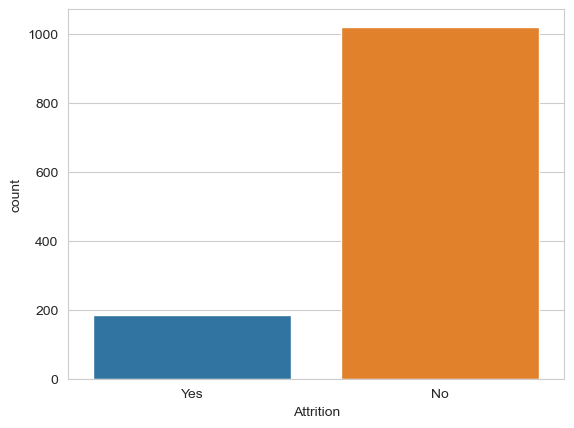

In [19]:
sns.countplot(x=df['Attrition'])

In [ ]:
## Label Encoding

In [22]:
# classifying the data
d = {'Yes': 1, 'No': 0}


In [23]:
df['Attrition'] = df['Attrition'].map(d)

In [24]:
df['Attrition'].value_counts()

Attrition
0.0    1020
1.0     185
Name: count, dtype: int64

In [27]:
null_values = df[df.Attrition.isnull()]
null_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265 entries, 367 to 1465
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       265 non-null    int64  
 1   BusinessTravel            265 non-null    object 
 2   DailyRate                 265 non-null    int64  
 3   Department                265 non-null    object 
 4   DistanceFromHome          265 non-null    int64  
 5   Education                 265 non-null    int64  
 6   EducationField            265 non-null    object 
 7   EmployeeCount             265 non-null    int64  
 8   EmployeeNumber            265 non-null    int64  
 9   EnvironmentSatisfaction   265 non-null    int64  
 10  Gender                    265 non-null    object 
 11  HourlyRate                265 non-null    int64  
 12  JobInvolvement            265 non-null    int64  
 13  JobLevel                  265 non-null    int64  
 14  JobRole     

In [28]:
not_null_values = df[df.Attrition.notnull()]
not_null_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1205 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1205 non-null   int64  
 1   BusinessTravel            1205 non-null   object 
 2   DailyRate                 1205 non-null   int64  
 3   Department                1205 non-null   object 
 4   DistanceFromHome          1205 non-null   int64  
 5   Education                 1205 non-null   int64  
 6   EducationField            1205 non-null   object 
 7   EmployeeCount             1205 non-null   int64  
 8   EmployeeNumber            1205 non-null   int64  
 9   EnvironmentSatisfaction   1205 non-null   int64  
 10  Gender                    1205 non-null   object 
 11  HourlyRate                1205 non-null   int64  
 12  JobInvolvement            1205 non-null   int64  
 13  JobLevel                  1205 non-null   int64  
 14  JobRole      

In [51]:
x = not_null_values.drop('Attrition', axis=1)
y = not_null_values[['Attrition']]

In [36]:
x.head(), y.head()

(   Age     BusinessTravel  DailyRate              Department  \
 0   41      Travel_Rarely       1102                   Sales   
 1   49  Travel_Frequently        279  Research & Development   
 2   37      Travel_Rarely       1373  Research & Development   
 3   33  Travel_Frequently       1392  Research & Development   
 4   27      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
 0                        2  Female        

In [52]:
x = pd.get_dummies(x, drop_first=True)
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,2,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,49,279,8,1,1,2,3,61,2,2,2,1,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,37,1373,2,2,1,4,4,92,2,1,3,2,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True
3,33,1392,3,4,1,5,4,56,3,1,3,1,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,27,591,2,1,1,7,1,40,3,1,2,1,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

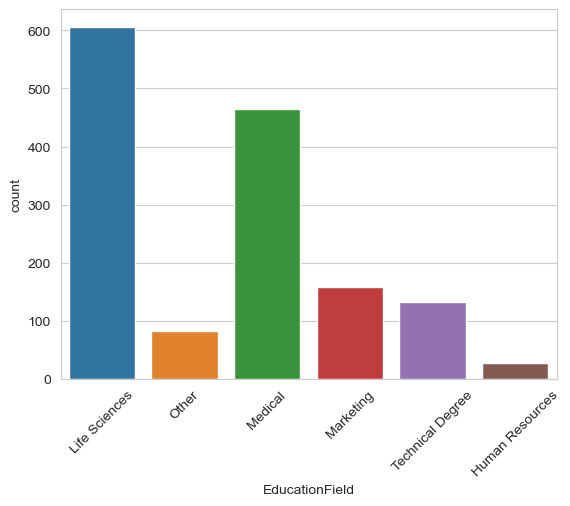

In [42]:


sns.countplot(x=df['EducationField'])
plt.xticks(rotation=45)

In [43]:
x.shape

(1205, 46)

In [ ]:
## Train test split

In [56]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [44]:
## Model Building

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

g = GaussianNB()
b = BernoulliNB()

In [57]:
g.fit(x_train, y_train)


GaussianNB()

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [59]:
g_pred = g.predict(x_test)

In [61]:
accuracy_score(g_pred, y_test)

0.7883817427385892

In [62]:
confusion_matrix(g_pred, y_test)

array([[171,  11],
       [ 40,  19]])

<Axes: >

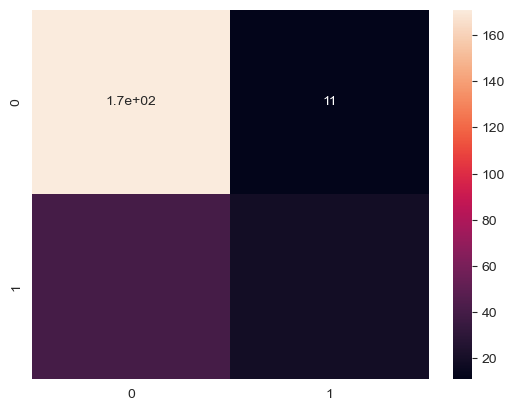

In [63]:
sns.heatmap(confusion_matrix(g_pred, y_test), annot=True)

In [65]:
print(classification_report(g_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87       182
         1.0       0.63      0.32      0.43        59

    accuracy                           0.79       241
   macro avg       0.72      0.63      0.65       241
weighted avg       0.77      0.79      0.76       241



In [66]:
b.fit(x_train, y_train)

BernoulliNB()

In [67]:
b_pred = b.predict(x_test)

In [68]:
accuracy_score(b_pred, y_test)

0.8257261410788381

In [69]:
confusion_matrix(b_pred, y_test)


array([[192,  23],
       [ 19,   7]])

In [70]:
print(classification_report(b_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       215
         1.0       0.23      0.27      0.25        26

    accuracy                           0.83       241
   macro avg       0.57      0.58      0.58       241
weighted avg       0.84      0.83      0.83       241



In [72]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [73]:
lr.fit(x_train, y_train)


LogisticRegression()

In [74]:
lr_pred = lr.predict(x_test)

In [75]:
accuracy_score(lr_pred, y_test)

0.8672199170124482

In [76]:
confusion_matrix(lr_pred, y_test)

array([[209,  30],
       [  2,   0]])

In [77]:
print(classification_report(lr_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93       239
         1.0       0.00      0.00      0.00         2

    accuracy                           0.87       241
   macro avg       0.50      0.44      0.46       241
weighted avg       0.98      0.87      0.92       241



In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


In [79]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [80]:
knn_pred = knn.predict(x_test)

In [81]:
accuracy_score(knn_pred, y_test)

0.8547717842323651

In [82]:
confusion_matrix(knn_pred, y_test)

array([[205,  29],
       [  6,   1]])

In [83]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       234
         1.0       0.03      0.14      0.05         7

    accuracy                           0.85       241
   macro avg       0.50      0.51      0.49       241
weighted avg       0.94      0.85      0.90       241



In [84]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()


In [85]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
dt_pred = dt.predict(x_test)

In [87]:
accuracy_score(dt_pred, y_test)

0.7759336099585062

In [88]:
confusion_matrix(dt_pred, y_test)

array([[177,  20],
       [ 34,  10]])

In [89]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       197
         1.0       0.33      0.23      0.27        44

    accuracy                           0.78       241
   macro avg       0.59      0.56      0.57       241
weighted avg       0.75      0.78      0.76       241



In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()


In [91]:
rf.fit(x_train, y_train)


RandomForestClassifier()

In [92]:
rf_pred = rf.predict(x_test)

In [93]:
accuracy_score(rf_pred, y_test)

0.8755186721991701

In [94]:
confusion_matrix(rf_pred, y_test)


array([[208,  27],
       [  3,   3]])

In [95]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.89      0.93       235
         1.0       0.10      0.50      0.17         6

    accuracy                           0.88       241
   macro avg       0.54      0.69      0.55       241
weighted avg       0.96      0.88      0.91       241



In [96]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

In [97]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [98]:
gbc_pred = gbc.predict(x_test)

In [99]:
accuracy_score(gbc_pred, y_test)

0.8879668049792531

In [100]:
confusion_matrix(gbc_pred, y_test)

array([[208,  24],
       [  3,   6]])

In [101]:
print(classification_report(gbc_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       232
         1.0       0.20      0.67      0.31         9

    accuracy                           0.89       241
   macro avg       0.59      0.78      0.62       241
weighted avg       0.96      0.89      0.92       241



In [102]:
def test(a, b):
    return a + b ** 2

In [104]:
test(a=2, b=3)

11

In [105]:
test(2, 3)

11